## Algoritmia
### Práctica 7
En esta práctica se realizarán funciones para representar montículos. Las soluciones se pueden plantear mediante divide y vencerás.

Se pide la implementación de las clases y/o funciones que aparecen a continuación.

Las instrucción "pass" que aparecen en el cuerpo de las clases o funciones, se debe sustituir por la implementación adecuada.

Para cada clase o función que se pide se proporciona una o más funciones con algunos tests.

Al llamar a las funciones de test no debería saltar ninguna aserción.

### Representación de montículos en cadenas
Dado un [montículo](https://youtu.be/qapnpHe8XPM?list=PLCsrYL37r9im86gYrlVPtYta8DLHGNMa0) se quiere una cadena de caracteres con una representación textual de dicho montículo.

Los montículos son [árboles completos](https://youtu.be/DwsR7lKdRUc?list=PLCsrYL37r9im86gYrlVPtYta8DLHGNMa0).

El montículo vendrá dado por una lista con los elementos, tal como se hace en el módulo [heapq](https://docs.python.org/3.5/library/heapq.html).

Por ejemplo, si hacemos

```print(representa_monticulo([3, 15, 68, 34, 39, 85, 85, 71, 47, 84]))```

se debería obtener:

```            
            3
      15       68
  34      39 85  85
71  47  84```

In [1]:
def calcular_desplazamiento_nivel(monticulo):
    '''
    Parametro de entrada: monticulo
    
    Devuelve una lista, en la que se encuentra el desplazamiento de nivel
    por cada nodo, junto con su nivel de la forma [[nivel,desplazamiento]].
    '''
    desplazamiento_nivel = []
    count = 0

    while len(desplazamiento_nivel) != len(monticulo):
        puntero = (2**count) - 1
        lista_nivel = monticulo[puntero:(2*puntero) + 1]
        for i in range(len(lista_nivel)):
            desplazamiento_nivel.append([count,i])
        count += 1
    return desplazamiento_nivel

In [10]:
def calcular_inorden(monticulo,nodo):
    '''
    Parametros de entrada: monticulo, nodo
    
    Dado un monticulo, y la posición de un nodo, devuelve una lista ordenada
    en inorden, la estructura de la lista es [[nodo,posición]]. El nodo es el
    elemento a calcular, y la posición es la que ocupa dicho elemento dentro
    del monticulo
    '''
    inorden = []
    
    if nodo >= len(monticulo):
        return inorden
    
    hijo_izquierdo = 2*nodo + 1
    hijo_derecho = 2*nodo + 2
    inorden += calcular_inorden(monticulo, hijo_izquierdo)
    inorden.append([monticulo[nodo],nodo])
    inorden += calcular_inorden(monticulo, hijo_derecho)
    return inorden

In [3]:
def representa_monticulo(monticulo):
    """
    Dada una lista que contiene un montículo, devuelve una cadena con una
    representación del montículo.
    La cadena tendrá tantas líneas como niveles, la raíz estará en la primera
    línea, los hijos de la raíz en la segunda...
    La posición de un elemento dentro de su línea será la suma de las longitudes
    de las cadenas (obtenidas con la función str()) que representan todos los
    elementos a su izquierda en el montículo, de cualquier nivel.
    """
    inorden=calcular_inorden(monticulo,0)
    cont=0
    contSalto=1
    pasados=[]
    representacion=""
    avanzo=0
    for i in monticulo:
        espacio=0
        avanzo=0
        for j,k in inorden:
            if not cont==k and not k in pasados:
                espacio+=len(str(j))       
            elif cont==k:
                break
            elif k in pasados:
                for h,f in inorden[avanzo:]:
                    avanzo+=1
                    if f!=k:
                        espacio-=len(str(h))
                    else:
                        break
        cont+=1
        representacion+=" " * espacio +str(j)
        pasados.append(k)
        if cont==contSalto:
            representacion+="\n"
            contSalto=(contSalto*2)+1
            pasados=[]
    return representacion

#### Casos de prueba para `representa_monticulo`

In [4]:
def representaciones_parecidas(r1, r2):
    """
    Dadas dos cadenas con dos representaciones de un montículo comprueba si 
    son "parecidas": contienen las mismas líneas con los mismos elementos, con 
    independencia del número de espacios.
    """
    
    r1 = r1.replace('\n', ' * ')
    r2 = r2.replace('\n', ' * ')
    return ' '.join(r1.split()) == ' '.join(r2.split())

In [5]:
def test_representa_monticulo(relajado = True, imprime = True):
    """
    Tests para la función representa_monticulo.
    Si "relajado" es False, las cadenas deben ser idénticas. Si no, vale con que
    sean parecidas.
    Las representaciones se imprimen en función del valor de "imprime".
    """
    
    monticulos = ([3, 15, 68, 34, 39, 85, 85, 71, 47, 84],
                  [19, 86, 475, 353, 761, 500, 747, 397, 384, 944],
                  ['a', 'abbdd', 'bc', 'bace', 'bac', 'fce', 'e', 'eeae', 'ee', 'ca'])
    
    representaciones = (
"""            3
      15       68
  34      39 85  85
71  47  84""",
"""                 19
         86           475
   353        761  500   747
397   384  944""", 
"""                    a
          abbdd         bc
    bace         bac fce  e
eeae    ee     ca""")
    
    for monticulo, representacion in zip(monticulos, representaciones):
        r = representa_monticulo(monticulo)
        if imprime:
            print(r, "\n")
        if relajado:
            assert representaciones_parecidas(r, representacion)
        else:
            assert r == representacion

In [6]:
if __name__ == "__main__": 
    test_representa_monticulo(relajado = True)
    print("OK")

            3
      15       68
  34      39 85  85
71  47  84 

                 19
         86           475
   353        761  500   747
397   384  944 

                    a
          abbdd         bc
    bace         bac fce  e
eeae    ee     ca 

OK


In [7]:
if __name__ == "__main__": 
    test_representa_monticulo(relajado = False, imprime = False)
    print("OK")

OK


### Representación gráfica del montículo
Para la representación gráfica se plantea una función que asigne una posición a cada nodo del montículo

In [8]:
def posiciones_monticulo(monticulo):
    """
    Dada una lista que contiene un montículo, devuelve una lista con las 
    posiciones de cada nodo.
    Las posiciones son tuplas con dos enteros. 
    El primero entero es la posición en el recorrido en inorden.
    El segundo es la profundidad del nodo, la raíz tiene profundidad 0, sus 
    hijos profundidad 1...
    """
    desplz = calcular_desplazamiento_nivel(monticulo)
    inorden = calcular_inorden(monticulo,0)
    resultado = []
    num_calculados = []
    
    for i in range(len(monticulo)):
        for j in range(len(inorden)):
            if i == inorden[j][1]:
                resultado.append(tuple([j+1,desplz[i][0]]))
                break
   
    return resultado

#### Casos de prueba para `posiciones_monticulo`

In [9]:
def test_posiciones_monticulo():
    """Tests para la función posiciones_monticulo."""
    
    monticulos = ([3, 15, 68, 34, 39, 85, 85, 71, 47, 84],
                  [3, 10, 68, 34, 15, 85, 85, 71, 47, 84, 39],
                  [2, 10, 3, 34, 15, 68, 85, 71, 47, 84, 39, 85],
                  [1, 10, 2, 34, 15, 3, 85, 71, 47, 84, 39, 85, 68]
                  )
    
    posiciones = ([(7, 0), (4, 1), (9, 1), (2, 2), (6, 2), (8, 2), (10, 2), 
                   (1, 3), (3, 3), (5, 3)], 
                  [(8, 0), (4, 1), (10, 1), (2, 2), (6, 2), (9, 2), (11, 2), 
                   (1, 3), (3, 3), (5, 3), (7, 3)],
                  [(8, 0), (4, 1), (11, 1), (2, 2), (6, 2), (10, 2), (12, 2), 
                   (1, 3), (3, 3), (5, 3), (7, 3), (9, 3)],
                  [(8, 0), (4, 1), (12, 1), (2, 2), (6, 2), (10, 2), (13, 2), 
                   (1, 3), (3, 3), (5, 3), (7, 3), (9, 3), (11, 3)]
                 )
    
    for monticulo, pos in zip(monticulos, posiciones):
        assert posiciones_monticulo(monticulo) == pos
        
if __name__ == "__main__": 
    test_posiciones_monticulo()
    print("OK") 

OK


### Dibujo de los montículos
Se representan los montículos como grafos de `networkx` y se utiliza está biblioteca para dibujar los grafos.
Las posiciones de los nodos pueden ser asignadas en la propia función de dibujo o las obtenidas mediante `posiciones_monticulo`.

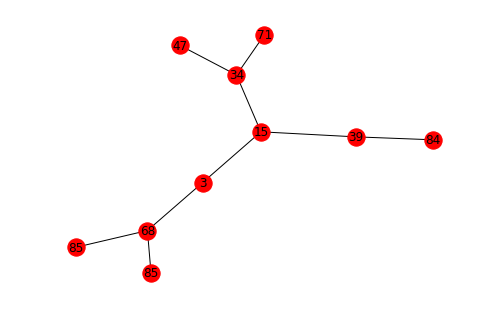

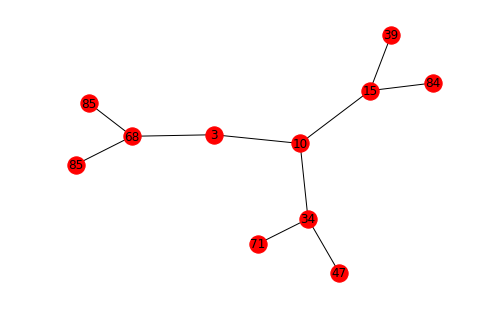

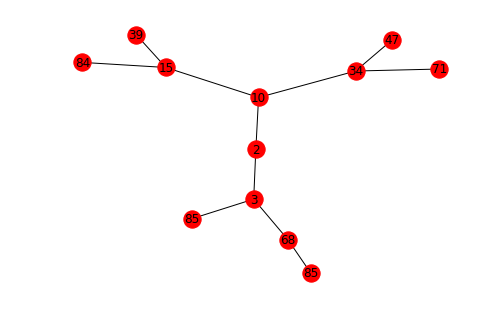

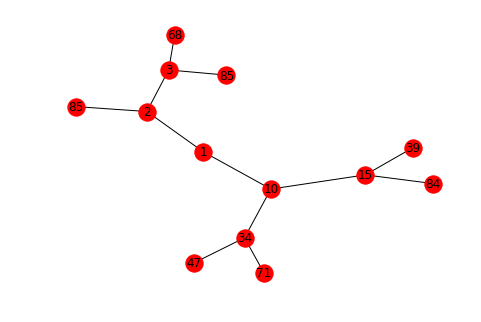

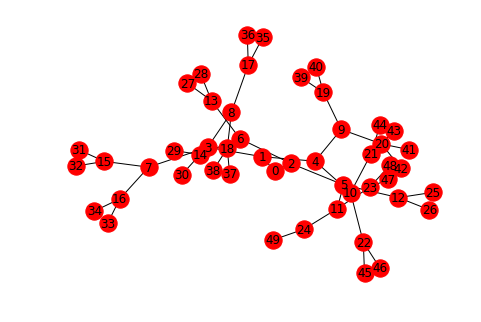

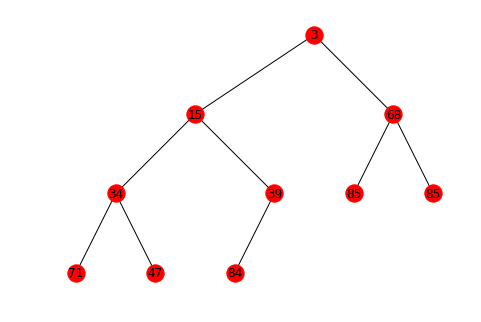

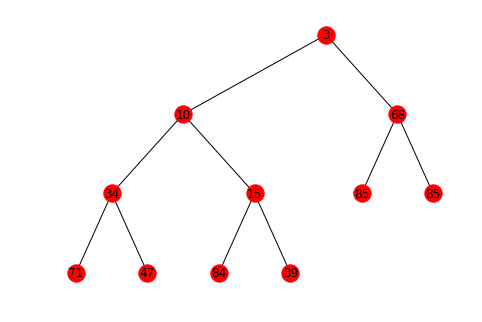

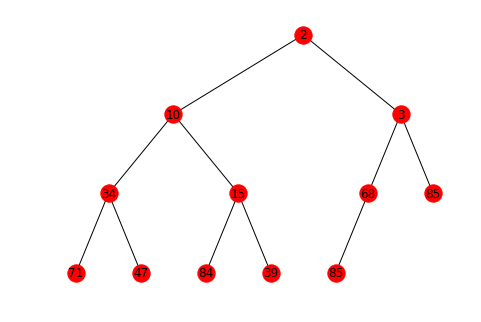

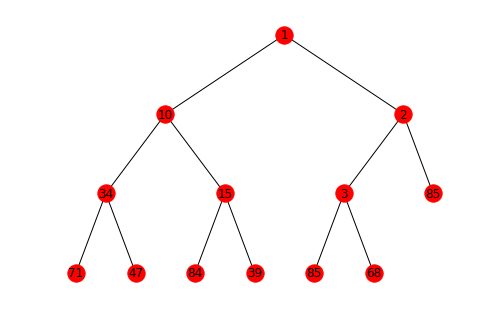

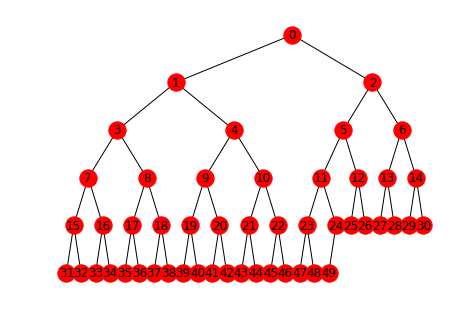

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

def dibuja_monticulo(monticulo, asignando_posiciones = True):
    g = nx.Graph()
    for i, v in enumerate(monticulo):
        g.add_node(i + 1, valor = v)
    for i in range(2, len(monticulo) + 1):
        g.add_edge(i // 2, i)
    if asignando_posiciones:
        posiciones = {n + 1 : (x, -y) for n, (x, y) in enumerate(
            posiciones_monticulo(monticulo))}
    else:
        posiciones = None
    nx.draw(g, with_labels = True, labels = nx.get_node_attributes(g, 'valor'), 
            pos = posiciones)
    
if __name__ == "__main__": 
    monticulos =  ([3, 15, 68, 34, 39, 85, 85, 71, 47, 84], 
                   [3, 10, 68, 34, 15, 85, 85, 71, 47, 84, 39], 
                   [2, 10, 3, 34, 15, 68, 85, 71, 47, 84, 39, 85],
                   [1, 10, 2, 34, 15, 3, 85, 71, 47, 84, 39, 85, 68],
                   range(50)
                  )

    for monticulo in monticulos:
        dibuja_monticulo(monticulo, False)
        plt.show()
        
    for monticulo in monticulos:
        dibuja_monticulo(monticulo)
        plt.show()